In [1]:
import os

In [2]:
%pwd


'/Users/koushal/vine_quanlity/research'

In [3]:
os.chdir("../")

In [5]:
%pwd

'/Users/koushal/vine_quanlity'

In [19]:
import pandas as pd

In [20]:
import numpy as np

In [21]:
Data_path= "data/winequality-red.csv"

In [22]:
df = pd.read_csv(Data_path)


In [23]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


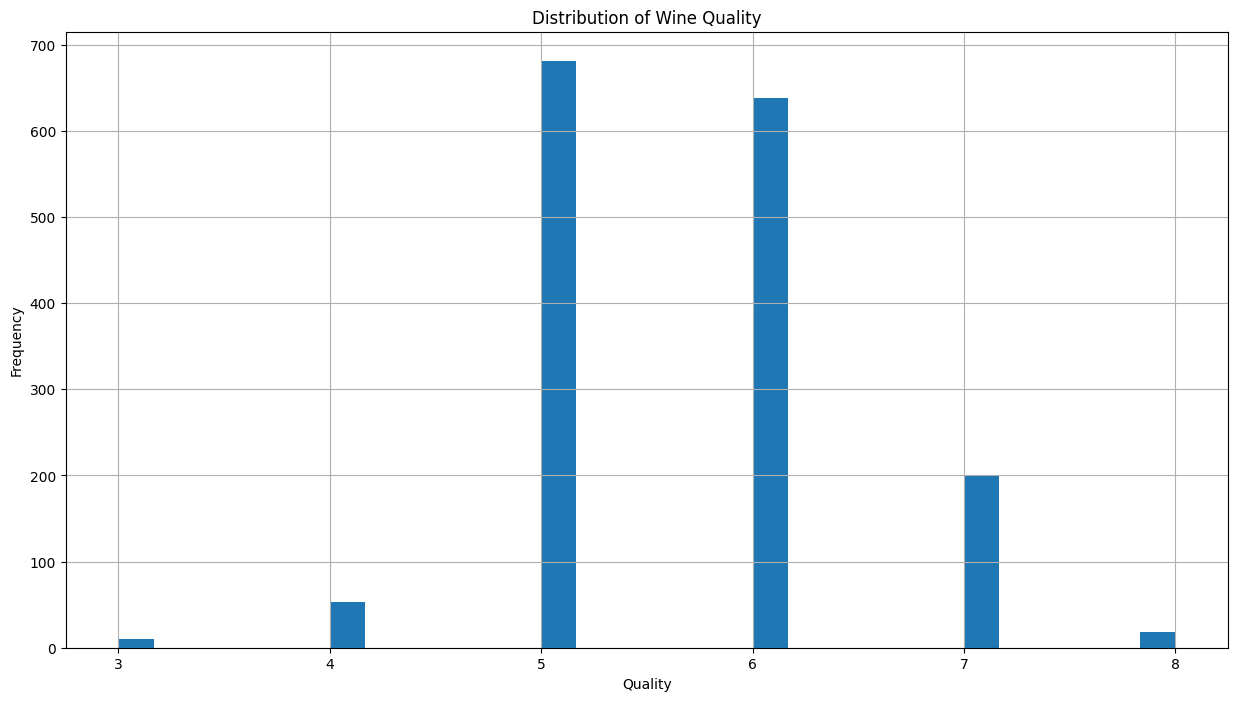

In [30]:
import matplotlib.pyplot as plt
df['quality'].hist(bins=30, figsize=(15, 8))
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.title("Distribution of Wine Quality")
plt.show()

In [33]:
X = df.drop(["quality"], axis=1)
y = df["quality"]

In [34]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [35]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1279, 11) (320, 11) (1279,) (320,)


In [39]:
from sklearn.linear_model import ElasticNet



In [41]:
lr= ElasticNet(alpha= 0.1,l1_ratio=0.5,random_state=42)
lr.fit(X_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [43]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [44]:
pred= lr.predict(X_test)
(rmse, mae, r2)= eval_metrics(y_test, pred)

In [45]:
print("rmse: ", rmse)
print("mae: ", mae)
print("r2: ", r2)

rmse:  0.6985911523308714
mae:  0.5590548688059019
r2:  0.25321312561494624
